In [1]:
from csv import QUOTE_NONNUMERIC

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
#from memote import ReportConfiguration
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

ImportError: cannot import name UMAP

In [27]:
%matplotlib inline

In [25]:
plt.rcParams['figure.figsize'] = 16, 9

In [8]:
colors = [
  "#A6A9AA",
  "#000000",
  "#3E7CBC",
  "#A3D2E2",
  "#DDEDF6",
  "#EDA85F",
  "#CD2028"
]

## Extract

In [9]:
bucket = []
for filename, collection in [
    ("../data/bigg.csv.gz", "bigg"),
    ("../data/uminho.csv.gz", "uminho"),
    ("../data/mmodel.csv.gz", "ebrahim"),
    ("../data/agora.csv.gz", "agora"),
    ("../data/embl_gems.csv.gz", "embl"),
    ("../data/path2models.csv.gz", "path"),
    ("../data/seed.csv.gz", "seed"),
]:
    tmp = pd.read_csv(filename)
    tmp["collection"] = collection
    bucket.append(tmp)
df = pd.concat(bucket, ignore_index=True)

In [10]:
df.shape

(1379545, 8)

In [11]:
df.head()

,test,title,section,metric,numeric,model,time,collection
0,test_absolute_extreme_coefficient_ratio,Ratio Min/Max Non-Zero Coefficients,matrix,0.0,NaN,iE2348C_1286,0.046556,bigg
1,test_biomass_consistency,Biomass Consistency,test_biomass,0.0,0.999658,iE2348C_1286,0.000978,bigg
2,test_biomass_consistency,Biomass Consistency,test_biomass,0.0,0.999994,iE2348C_1286,0.000775,bigg
3,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,1.0,0.000000,iE2348C_1286,0.006497,bigg
4,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,0.0,0.982478,iE2348C_1286,0.739684,bigg


## Transform

Exclude the biomass section since it is not universally applicable and may contain multiple reactions per model. We also exclude the matrix section since that is purely informative and says nothing about the model quality.

In [12]:
df = df.loc[~df["section"].isin([
    "matrix",
    "test_biomass"
]), :]

We further exclude tests related to the biomass but from different sections.

In [13]:
df = df.loc[~df["test"].isin([
    "test_biomass_open_production",
    "test_essential_precursors_not_in_biomass",
    "test_gam_in_biomass"
]), :]

In [14]:
df["collection"].unique()

array(['bigg', 'uminho', 'ebrahim', 'agora', 'embl', 'path', 'seed'], dtype=object)

### Pivot Table

Each model from each collection is one observation (row) and each test case constitutes one variable or category (column) measuring model performance.

In [15]:
observations = df.set_index(["collection", "model", "test"])

Check for duplicates which will prevent unstacking.

In [16]:
observations[observations.index.duplicated(keep=False)].sort_index()

,,,title,section,metric,numeric,time
collection,model,test,,,,,


In [17]:
observations = observations.loc[:, ["metric"]].unstack()
observations.head()

metric  \
test                                             test_biomass_specific_sbo_presence   
collection model                                                                      
agora      Abiotrophia_defectiva_ATCC_49176                                     1.0   
           Achromobacter_xylosoxidans_A8                                        1.0   
           Achromobacter_xylosoxidans_NBRC_15126                                1.0   
           Acidaminococcus_fermentans_DSM_20731                                 1.0   
           Acidaminococcus_intestini_RyC_MR95                                   1.0   

                                                                         \
test                                             test_blocked_reactions   
collection model                                                          
agora      Abiotrophia_defectiva_ATCC_49176                    0.285182   
           Achromobacter_xylosoxidans_A8                       0.356715   
           Achromobacter_xylosoxidans_NBRC_15126               0.288530   
           Acidaminococcus_fermentans_DSM_20731                0.347550   
           Acidaminococcus_intestini_RyC_MR95                  0.302697   

                                                                             \
test                                             test_compartments_presence   
collection model                                                              
agora      Abiotrophia_defectiva_ATCC_49176                             0.0   
           Achromobacter_xylosoxidans_A8                                0.0   
           Achromobacter_xylosoxidans_NBRC_15126                        0.0   
           Acidaminococcus_fermentans_DSM_20731                         0.0   
           Acidaminococcus_intestini_RyC_MR95                           0.0   

                                                                                    \
test                                             test_demand_specific_sbo_presence   
collection model                                                                     
agora      Abiotrophia_defectiva_ATCC_49176                                    1.0   
           Achromobacter_xylosoxidans_A8                                       1.0   
           Achromobacter_xylosoxidans_NBRC_15126                               1.0   
           Acidaminococcus_fermentans_DSM_20731                                1.0   
           Acidaminococcus_intestini_RyC_MR95                                  1.0   

                                                                                      \
test                                             test_exchange_specific_sbo_presence   
collection model                                                                       
agora      Abiotrophia_defectiva_ATCC_49176                                      1.0   
           Achromobacter_xylosoxidans_A8                                         1.0   
           Achromobacter_xylosoxidans_NBRC_15126                                 1.0   
           Acidaminococcus_fermentans_DSM_20731                                  1.0   
           Acidaminococcus_intestini_RyC_MR95                                    1.0   

                                                                    \
test                                             test_fbc_presence   
collection model                                                     
agora      Abiotrophia_defectiva_ATCC_49176                    0.0   
           Achromobacter_xylosoxidans_A8                       0.0   
           Achromobacter_xylosoxidans_NBRC_15126               0.0   
           Acidaminococcus_fermentans_DSM_20731                0.0   
           Acidaminococcus_intestini_RyC_MR95                  0.0   

                                                                                             \
test                                             test_find_candidate_irreversible_reactions   
c

In [18]:
observations.shape

(10828, 113)

In [19]:
observations.index.get_level_values("collection").unique()

Index([u'agora', u'bigg', u'ebrahim', u'embl', u'path', u'seed', u'uminho'], dtype='object', name=u'collection')

### Handle Missing Values

In [20]:
observations.isna().sum(axis=0).sort_values(ascending=False)

        test                                                  
metric  test_gene_product_annotation_overview-kegg.genes          59
        test_gene_product_annotation_overview-asap                59
        test_gene_product_annotation_overview-ecogene             59
        test_gene_product_annotation_overview-hprd                59
        test_gene_product_annotation_overview-ncbigene            59
        test_gene_product_annotation_overview-ncbigi              59
        test_gene_product_annotation_overview-ncbiprotein         59
        test_gene_product_annotation_overview-refseq              59
        test_gene_product_annotation_overview-uniprot             59
        test_gene_product_annotation_overview-ccds                59
        test_metabolite_annotation_overview-seed.compound          1
        test_metabolite_annotation_overview-pubchem.compound       1
        test_metabolite_annotation_overview-metanetx.chemical      1
        test_metabolite_annotation_overv

We set the missing values equivalent to being completely wrong, i.e., metric = 1.

In [21]:
observations[observations.isna()] = 1.0

In [49]:
observations.to_csv('memote_clustering_metric_data_observationsObject.tsv', sep='\t')

## Dimension Reduction

### PCA

In [29]:
%%time
pca = PCA(n_components=2).fit_transform(observations)

CPU times: user 273 ms, sys: 12.2 ms, total: 286 ms
Wall time: 445 ms


In [30]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(pca[mask, 0])
    y.extend(pca[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_pca.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

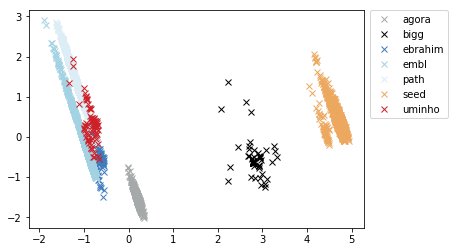

In [31]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(pca[mask, 0], pca[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### t-SNE

In [45]:
%%time
tsne = TSNE(n_components=2, perplexity=5, n_iter=5000).fit_transform(observations)

CPU times: user 5min 31s, sys: 71.9 ms, total: 5min 32s
Wall time: 5min 32s


In [46]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(tsne[mask, 0])
    y.extend(tsne[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_tsne.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

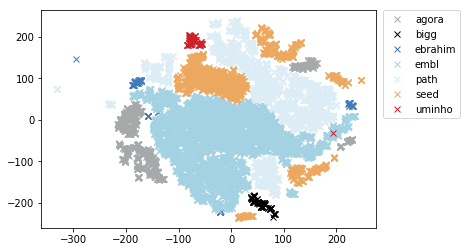

In [47]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

In [55]:
%%time
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000).fit_transform(observations)

CPU times: user 5min 48s, sys: 236 ms, total: 5min 48s
Wall time: 5min 49s


In [56]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(tsne[mask, 0])
    y.extend(tsne[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_tsne.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

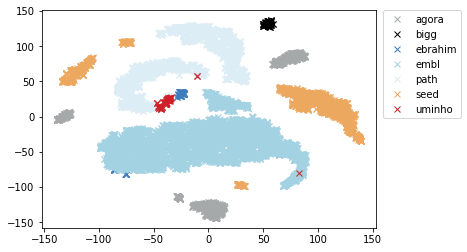

In [57]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

In [41]:
%%time
tsne = TSNE(n_components=2, perplexity=40, n_iter=5000).fit_transform(observations)

CPU times: user 1min 18s, sys: 16 ms, total: 1min 18s
Wall time: 1min 18s


In [43]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(tsne[mask, 0])
    y.extend(tsne[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_tsne.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

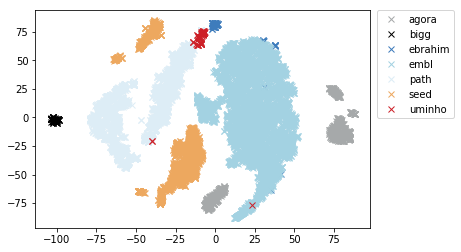

In [44]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

In [48]:
%%time
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000).fit_transform(observations)

CPU times: user 6min 17s, sys: 104 ms, total: 6min 17s
Wall time: 6min 18s


In [50]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(tsne[mask, 0])
    y.extend(tsne[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_tsne.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

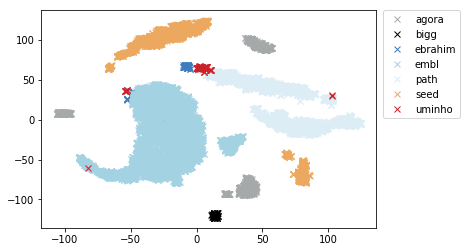

In [51]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

In [52]:
%%time
tsne = TSNE(n_components=2, perplexity=50, n_iter=10000).fit_transform(observations)

CPU times: user 12min 27s, sys: 248 ms, total: 12min 27s
Wall time: 12min 28s


In [53]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(tsne[mask, 0])
    y.extend(tsne[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_tsne.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

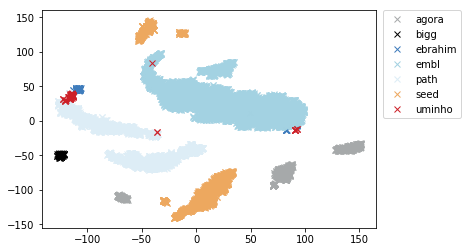

In [54]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### UMAP

In [26]:
%%time
umap = UMAP(n_components=2).fit_transform(observations)

/home/moritz/.virtualenvs/memote-meta/lib/python3.6/site-packages/umap/spectral.py:229 UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)


CPU times: user 20.2 s, sys: 2.64 s, total: 22.8 s
Wall time: 18.6 s


In [27]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(umap[mask, 0])
    y.extend(umap[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_umap.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

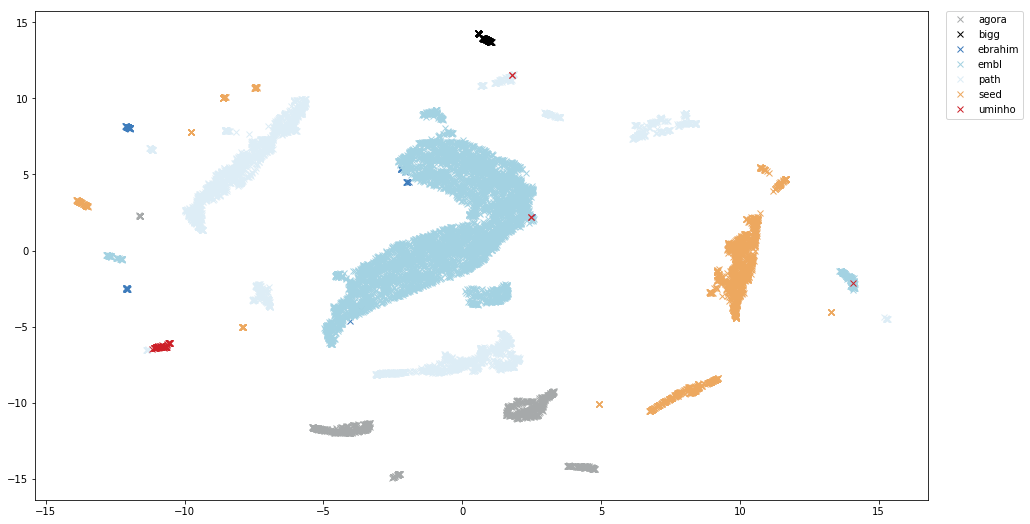

In [28]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(umap[mask, 0], umap[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()